# Lets move on to EXLORATION

#### Question time question time ask a question and answer in time!
1. How much of churn is effected by high monthly charges?
    - at what price is there a spike?
    - does it go back down after the spike(if there is one)?
2. Does tenure cause the highest churn?
3. How many fiber optic customers churn?

**must access the acquire.py file in order to pull the datafram**

In [3]:
import acquire

In [4]:
df = acquire.get_churn_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


**pull the prep_telco from the prapare.py file**
- prepare_telco will pull your clean_telco and split it into train test and validata automatically
    - clean_telco takes the datafram and cleans it by adding, deleting, altering the to the data.

In [5]:
from prepare import prep_telco

In [6]:
train, test, validate = prep_telco(df)

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats

In [8]:
train.corr()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,total_charges,churn,DSL,fiber_optic,no_internet,bank_transfer,credit_card,electronic_check,mailed_check,is_female
senior_citizen,1.000000,0.033718,-0.193369,0.016782,0.001361,0.143202,-0.030162,0.065964,0.069610,-0.050286,...,0.111951,0.132128,-0.108759,0.264281,-0.193316,-0.030471,-0.018912,0.181244,-0.154938,0.001507
partner,0.033718,1.000000,0.447471,0.394726,0.006396,0.133483,0.145519,0.144908,0.144854,0.125542,...,0.328581,-0.152042,-0.001124,-0.007096,0.009827,0.111206,0.103682,-0.097297,-0.101616,0.008635
dependents,-0.193369,0.447471,1.000000,0.170402,0.008433,-0.017970,0.069265,0.045070,-0.000591,0.071660,...,0.062435,-0.175388,0.044368,-0.178479,0.163895,0.056577,0.071224,-0.163369,0.058087,-0.005438
tenure,0.016782,0.394726,0.170402,1.000000,-0.005833,0.314712,0.325609,0.357079,0.354943,0.318645,...,0.818614,-0.340469,0.021445,-0.004030,-0.019737,0.236697,0.235921,-0.206524,-0.231792,-0.007699
phone_service,0.001361,0.006396,0.008433,-0.005833,1.000000,0.274213,-0.103258,-0.061935,-0.078294,-0.100001,...,0.102482,0.004124,-0.451902,0.288644,0.170775,0.009057,0.002034,0.001947,-0.013101,0.020104
multiple_lines,0.143202,0.133483,-0.017970,0.314712,0.274213,1.000000,0.099536,0.211201,0.194950,0.098406,...,0.459467,0.056758,-0.197714,0.372605,-0.221676,0.061691,0.059147,0.105948,-0.237468,-0.001862
online_security,-0.030162,0.145519,0.069265,0.325609,-0.103258,0.099536,1.000000,0.277855,0.271554,0.362684,...,0.411021,-0.172749,0.315987,-0.032029,-0.323732,0.102379,0.112952,-0.125271,-0.070558,0.010096
online_backup,0.065964,0.144908,0.045070,0.357079,-0.061935,0.211201,0.277855,1.000000,0.317521,0.294157,...,0.509990,-0.072911,0.168270,0.156943,-0.381766,0.083290,0.090149,-0.003739,-0.165898,0.007543
device_protection,0.069610,0.144854,-0.000591,0.354943,-0.078294,0.194950,0.271554,0.317521,1.000000,0.345335,...,0.526934,-0.034418,0.149920,0.178008,-0.386075,0.079899,0.105051,0.006769,-0.188890,0.004256
tech_support,-0.050286,0.125542,0.071660,0.318645,-0.100001,0.098406,0.362684,0.294157,0.345335,1.000000,...,0.429570,-0.157321,0.320221,-0.027101,-0.334516,0.101620,0.124822,-0.122804,-0.084160,0.012028


Text(0.5, 1.0, 'Correlation Heatmap')

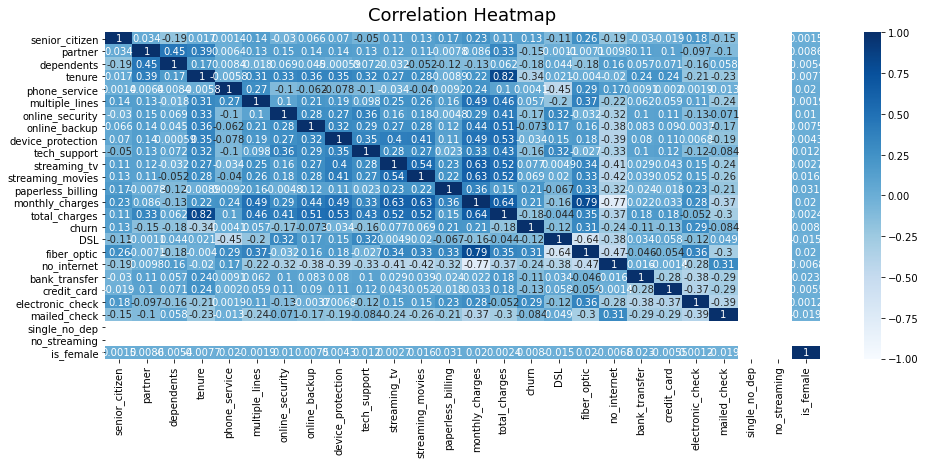

In [48]:
plt.figure(figsize=(16, 6))
corr_map = sns.heatmap(train.corr(), cmap="Blues", vmin=-1, vmax=1, annot=True)
corr_map.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# '-' (negative) is still correlation but is downward slope not upward

- In the above chart:
    - the darked the color the stronger the correlation is
    - the lighter the color the weaker the correlation is
- The strongest correlations to churn are:
    - monthly charges
        - .2
    - tenure
        - -.35
    - fiber optic service
        - .31
    - electronic check payment
        - .3
    - no internet service
        - -.23
- Monthly Charges:
    - Continuous
- Tenure:
    - Continuous
- Fiber optic
    - Categorical
- Electronic check
    - Categorical
- No internet Service
    - Categorical

### Monthly Charges exploration

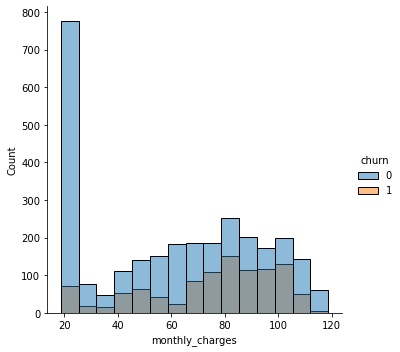

In [83]:
sns.displot(train, x=train.monthly_charges, hue = train.churn)

In [50]:
observe = pd.crosstab(train.churn, train.monthly_charges, margins = True)
observe

monthly_charges,18.7,18.75,18.8,18.85,18.9,18.95,19.0,19.05,19.1,19.15,...,116.45,116.8,116.85,116.95,117.15,117.6,118.35,118.6,118.65,All
churn,,,,,,,,,,,,,,,,,,,,,
0,1,1,3,1,2,0,3,4,4,7,...,1,1,1,1,1,1,0,2,1,2891
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1046
All,1,1,3,1,2,1,3,4,5,7,...,1,1,1,1,1,1,1,2,1,3937


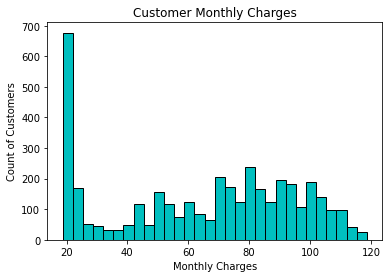

In [51]:
plt.figure()
plt.hist(train.monthly_charges, 30, facecolor='c', align='mid',
        edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Count of Customers')
plt.title('Customer Monthly Charges')
plt.show()

In [52]:
# t test is for catigorical vs continous
null_hypothesis = "Monthly Charges and churn are independent variables and do not effect one another"
alt_hypothesis = "Monthly Charges and churn are dependent of one another"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

#compare churned and not churned
churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

# we are using 2 sample b/c we are comparing 2 subgroups not 1 subgroup and whole 
    # single tail, b/c checking which one is higher
t, p = stats.ttest_ind(churned.monthly_charges, not_churned.monthly_charges, nan_policy='omit')
#p/2 along with t > 0 is how we compare means if higher
if p < alpha: 
    print("Reject the null hypothesis")
    print("We move forward wiht the alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move forwad wiht the null hypothesis:", null_hypothesis)
        #in enlgish this mean that there is not sufficient evidence

Reject the null hypothesis
We move forward wiht the alternative hypothesis:  Monthly Charges is a driver of chrun


**lets look at monthly_charges and fiber optic**

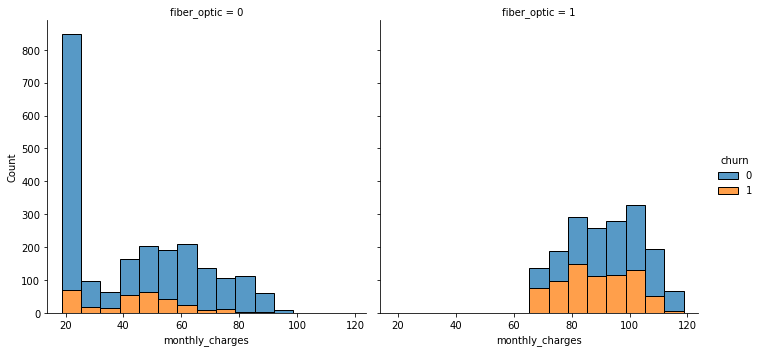

In [53]:
sns.displot(train, x = "monthly_charges", col = "fiber_optic", hue = "churn", multiple="stack")

**Lets look at monthly charges and electronic check**

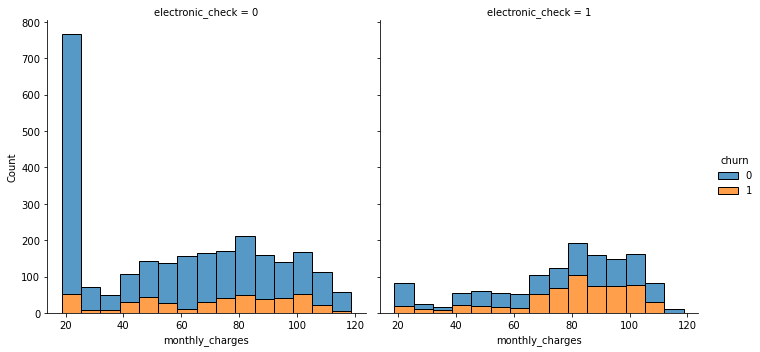

In [54]:
sns.displot(train, x = "monthly_charges", col = "electronic_check", hue = "churn", multiple="stack")


**Lets look at monhtly_charges and nointernet**

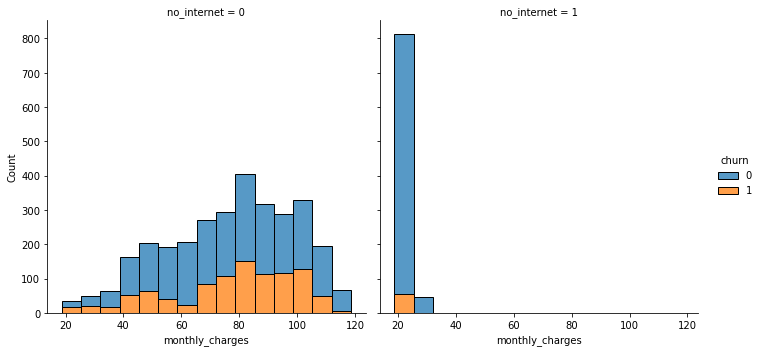

In [55]:
sns.displot(train, x = "monthly_charges", col = "no_internet", hue = "churn", multiple="stack")

### Tenure Exploration

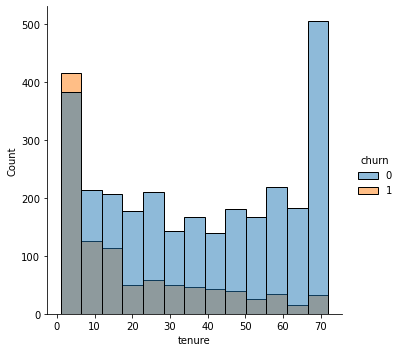

In [56]:
sns.displot(train, x=train.tenure, hue=train.churn)

In [57]:
observe = pd.crosstab(train.churn, train.tenure, margins = True)
observe

tenure,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,All
churn,,,,,,,,,,,,,,,,,,,,,
0,121,65,66,53,43,34,47,46,46,42,...,30,33,37,52,43,43,65,95,207,2891
1,208,62,46,40,39,21,27,27,31,25,...,2,5,6,7,6,6,7,4,2,1046
All,329,127,112,93,82,55,74,73,77,67,...,32,38,43,59,49,49,72,99,209,3937


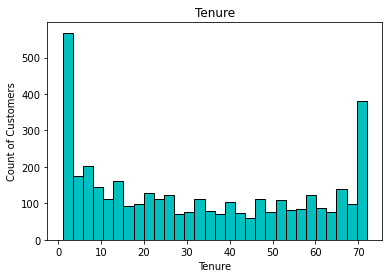

In [58]:
plt.figure()
plt.hist(train.tenure, 30, facecolor='c', align='mid',
        edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Count of Customers')
plt.title('Tenure')
plt.show()

In [59]:
# t test is for catigorical vs continous
null_hypothesis = "Tenure does not effect churn rate"
alt_hypothesis = "Tenure is a driver of chrun"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

#compare churned and not churned
churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

# we are using 2 sample b/c we are comparing 2 subgroups not 1 subgroup and whole 
    # single tail, b/c checking which one is higher
t, p = stats.ttest_ind(churned.tenure, not_churned.tenure, nan_policy='omit')
#p/2 along with t > 0 is how we compare means if higher
if p < alpha: 
    print("Reject the null hypothesis")
    print("We move forward wiht the alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move forwad wiht the null hypothesis:", null_hypothesis)
        #in enlgish this mean that there is not sufficient evidence

Reject the null hypothesis
We move forward wiht the alternative hypothesis:  Tenure is a driver of chrun


**Lets look at tenure and fiber optic**

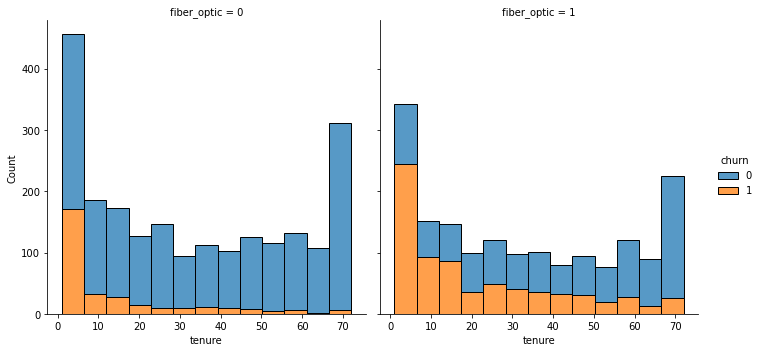

In [60]:
sns.displot(train, x = "tenure", col = "fiber_optic", hue = "churn", multiple="stack")

**Lets look at tenure and electronic check**

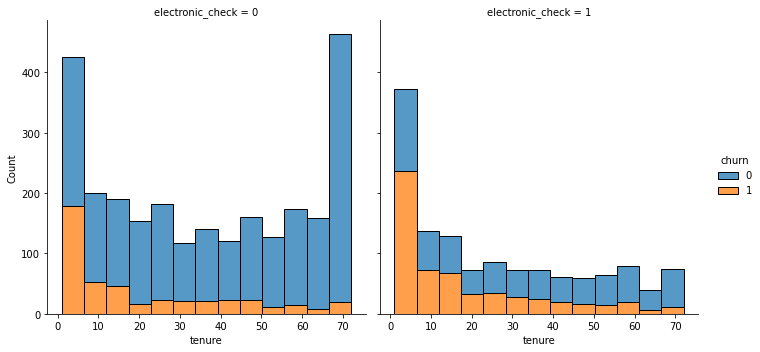

In [61]:
sns.displot(train, x = "tenure", col = "electronic_check", hue = "churn", multiple="stack")

**Lets look at tenure and no internet**

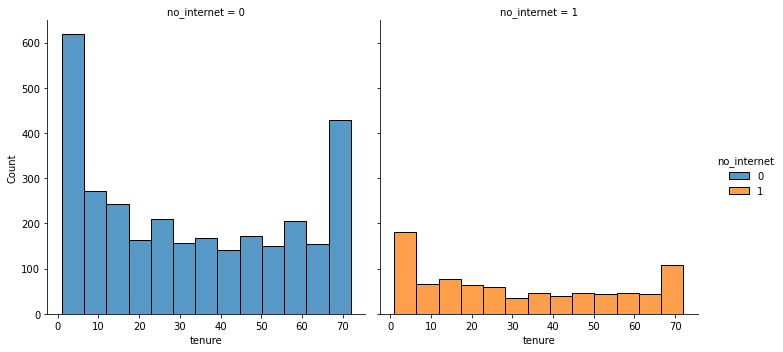

In [62]:
sns.displot(train, x = "tenure", col = "no_internet", hue = "no_internet", multiple="stack")


### Fiber Optic Exploration

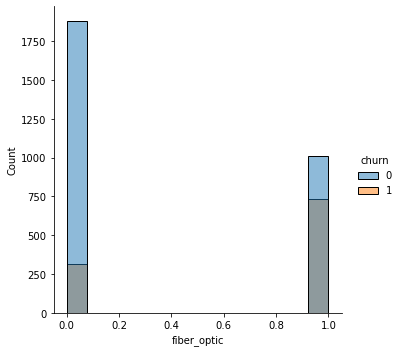

In [63]:
sns.displot(train, x=train.fiber_optic, hue=train.churn)

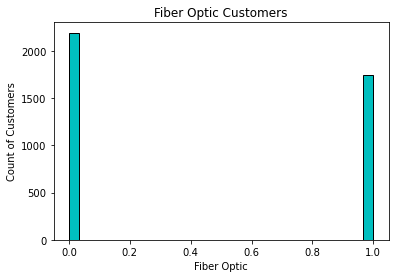

In [64]:
plt.figure()
plt.hist(train.fiber_optic, 30, facecolor='c', align='mid',
        edgecolor='black')
plt.xlabel('Fiber Optic')
plt.ylabel('Count of Customers')
plt.title('Fiber Optic Customers')
plt.show()

In [65]:
observe = pd.crosstab(train.churn, train.fiber_optic, margins = True)
    # normlaize makes it percentage
observe
    # here I can see that about 41% of people with fiber optics 

fiber_optic,0,1,All
churn,,,
0,1880,1011,2891
1,312,734,1046
All,2192,1745,3937


In [66]:
chi2, p, degf, expected = stats.chi2_contingency(observe)
expected
        # observed: 0.85 - expected: 0.73
        # observed: 0.58 - expected: 0.73
        # observed: 0.74 - expected: 0.73
        # observed: 0.14 - expected: 0.27
        # observed: 0.42 - expected: 0.27
        # observed: 0.26 - expected: 0.27

array([[1609.61950724, 1281.38049276, 2891.        ],
       [ 582.38049276,  463.61950724, 1046.        ],
       [2192.        , 1745.        , 3937.        ]])

In [67]:
p

3.4459817555876015e-82

In [68]:
# Chi test is for catigorical vs catigorical
null_hypothesis = "Fiber optic ownership and churn are each independent from each other"
alt_hypothesis = "Having Fiber Optic have a relationship"
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")

We reject the null hypothesis
We reject the hypothesis that Fiber optic ownership and churn are each independent from each other


### Electronic check Exploration

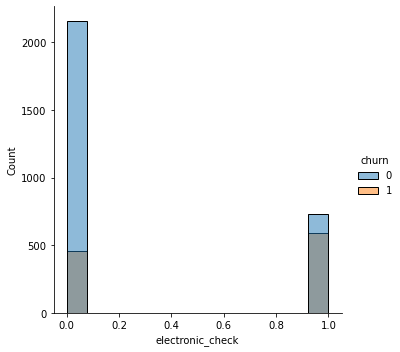

In [69]:
sns.displot(train, x=train.electronic_check, hue=train.churn)

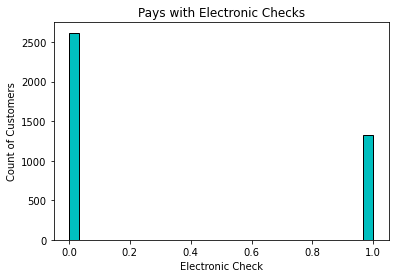

In [70]:
plt.figure()
plt.hist(train.electronic_check, 30, facecolor='c', align='mid',
        edgecolor='black')
plt.xlabel('Electronic Check')
plt.ylabel('Count of Customers')
plt.title('Pays with Electronic Checks')
plt.show()

In [71]:
observe = pd.crosstab(train.churn, train.electronic_check, margins = True)
    # normlaize makes it percentage
observe
    # here I can see that about 45% of people paying with e check ed up churning

electronic_check,0,1,All
churn,,,
0,2158,733,2891
1,459,587,1046
All,2617,1320,3937


In [72]:
chi2, p, degf, expected = stats.chi2_contingency(observe)
expected
        # observed: 0.83 - expected: 0.71
        # observed: 0.55 - expected: 0.71
        # observed: 0.74 - expected: 0.71
        # observed: 0.17 - expected: 0.29
        # observed: 0.44 - expected: 0.29
        # observed: 0.26 - expected: 0.29

array([[1921.70358141,  969.29641859, 2891.        ],
       [ 695.29641859,  350.70358141, 1046.        ],
       [2617.        , 1320.        , 3937.        ]])

In [73]:
p

2.436024208273411e-69

In [74]:
# Chi test is for catigorical vs catigorical
null_hypothesis = "Paying with an electronic check does not effect churn rate"
alt_hypothesis = "Paying with an electronic check is a driver of chrun"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative") 

We reject the null hypothesis
We reject the hypothesis that Paying with an electronic check does not effect churn rate


# No Internet Service Exploration

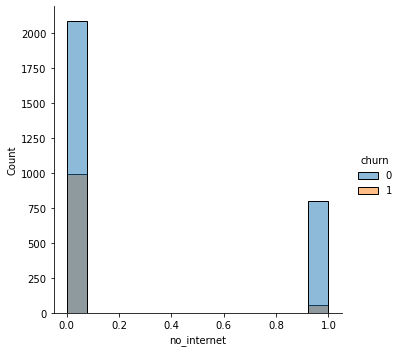

In [75]:
sns.displot(train, x=train.no_internet, hue=train.churn)

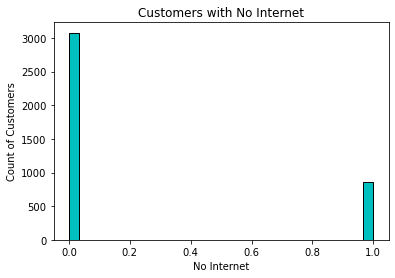

In [76]:
plt.figure()
plt.hist(train.no_internet, 30, facecolor='c', align='mid',
        edgecolor='black')
plt.xlabel('No Internet')
plt.ylabel('Count of Customers')
plt.title('Customers with No Internet')
plt.show()

In [77]:
observe = pd.crosstab(train.churn, train.no_internet, margins = True)
    # normlaize makes it percentage
observe
    # here I can see that about 45% of people paying with e check ed up churning

no_internet,0,1,All
churn,,,
0,2088,803,2891
1,991,55,1046
All,3079,858,3937


In [78]:
chi2, p, degf, expected = stats.chi2_contingency(observe)
expected
        # observed: 0.83 - expected: 0.71
        # observed: 0.55 - expected: 0.71
        # observed: 0.74 - expected: 0.71
        # observed: 0.17 - expected: 0.29
        # observed: 0.44 - expected: 0.29
        # observed: 0.26 - expected: 0.29

array([[2260.95732791,  630.04267209, 2891.        ],
       [ 818.04267209,  227.95732791, 1046.        ],
       [3079.        ,  858.        , 3937.        ]])

In [79]:
p

2.7683784889830834e-48

In [80]:
# Chi test is for catigorical vs catigorical
null_hypothesis = "Paying with an electronic check does not effect churn rate"
alt_hypothesis = "Paying with an electronic check is a driver of chrun"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative") 

We reject the null hypothesis
We reject the hypothesis that Paying with an electronic check does not effect churn rate


### Summarization
- our churn is at about 27%
- There are 5 primary drivers of churn
    - Monthly Charges
    - Tenure
    - Fiber optic customers
    - Electronic check payers
    - People with no internet services
- monthly charges
    - There is a spike in churn once monthly prices hit 70 to 110 dollars
    - far less churn because of monthly charges with the low monthly charges
    - 1,297 b
- tenure
    - overwhellming amount of churn within the first month of service
    - the longer the tenure the less the churn rate
        - these are very loyal customers
- fiber optic
    - fiber optic customers pay between 70 and 100 a month
    - 905 out of 2,170 customers with fiber optics churn
        - 41%
- electronic check
    - 738 out of the 1,654 customers paying with electronic check churn
        - 44%
- no internet
    - 73 out of 1,061 customers with no internet churn
        - 7%
            - definatly not a big driver compared to the others

Now what if we combine drivers?
- The biggest combo driver I found was Tenure and fiber optic

### Answer Previous Questions


1. How much of churn is effected by high monthly charges?
    - 20%
        - at what price is there a spike?
            - 70 per month
        - does it go back down after the spike(if there is one)?
            - at 100 per month the churn starts going back down
2. Does tenure have high churn?
    - yes
3. How many fiber optic customers churn?
    - 905 of the 2170 fiber optic customers churn
        - 41.7% of the fiber optic customers churn

### Takeaways and action plan

Our biggest driver of churn are fiber optic within the first 10 months of service